<a href="https://colab.research.google.com/github/rofiat13/ML-AI/blob/main/Gold_Price_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
from prophet import Prophet

In [32]:
price = pd.read_csv('gold_price_data.csv')

In [33]:
price.head()

,Date,Value
0,1970-01-01,35.2
1,1970-04-01,35.1
2,1970-07-01,35.4
3,1970-10-01,36.2
4,1971-01-01,37.4


In [34]:
price.shape

(10787, 2)

In [38]:
price.columns = ['ds', 'y']

In [39]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(price)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpgumsxf30/53f3er1e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgumsxf30/wqacywup.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1834', 'data', 'file=/tmp/tmpgumsxf30/53f3er1e.json', 'init=/tmp/tmpgumsxf30/wqacywup.json', 'output', 'file=/tmp/tmpgumsxf30/prophet_model7ctvesfs/prophet_model-20240410194953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:50:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [41]:
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01,-13.238678,-390.082435,-39.146153,-13.238678,-13.238678,-205.107458,-205.107458,-205.107458,-193.625036,...,-9.563610,-9.563610,-9.563610,-1.918812,-1.918812,-1.918812,0.0,0.0,0.0,-218.346137
1,1970-04-01,3.289713,-372.493514,-32.976527,3.289713,3.289713,-207.623260,-207.623260,-207.623260,-193.625036,...,-9.528652,-9.528652,-9.528652,-4.469572,-4.469572,-4.469572,0.0,0.0,0.0,-204.333547
2,1970-07-01,20.001754,-363.672876,-12.691169,20.001754,20.001754,-213.560113,-213.560113,-213.560113,-193.625036,...,-9.528652,-9.528652,-9.528652,-10.406424,-10.406424,-10.406424,0.0,0.0,0.0,-193.558359
3,1970-10-01,36.897443,-333.337842,15.754946,36.897443,36.897443,-195.957744,-195.957744,-195.957744,-193.625036,...,-9.563610,-9.563610,-9.563610,7.230903,7.230903,7.230903,0.0,0.0,0.0,-159.060300
4,1971-01-01,53.793133,-325.583061,29.309265,53.793133,53.793133,-205.444396,-205.444396,-205.444396,-193.625036,...,-9.711562,-9.711562,-9.711562,-2.107798,-2.107798,-2.107798,0.0,0.0,0.0,-151.651263


In [42]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
10882,2020-06-17,1405.268849,1030.215841,1363.201501,1402.893547,1407.905960,-212.216793,-212.216793,-212.216793,-193.625036,...,-9.528652,-9.528652,-9.528652,-9.063105,-9.063105,-9.063105,0.0,0.0,0.0,1193.052056
10883,2020-06-18,1405.173026,1013.813507,1369.307956,1402.697668,1407.838813,-212.405067,-212.405067,-212.405067,-193.625036,...,-9.563610,-9.563610,-9.563610,-9.216421,-9.216421,-9.216421,0.0,0.0,0.0,1192.767959
10884,2020-06-19,1405.077202,1011.934422,1373.593088,1402.501790,1407.771666,-212.710750,-212.710750,-212.710750,-193.625036,...,-9.711562,-9.711562,-9.711562,-9.374152,-9.374152,-9.374152,0.0,0.0,0.0,1192.366453
10885,2020-06-20,1404.981379,1060.757363,1396.667316,1402.305912,1407.704518,-178.954710,-178.954710,-178.954710,-193.625036,...,24.203089,24.203089,24.203089,-9.532763,-9.532763,-9.532763,0.0,0.0,0.0,1226.026669
10886,2020-06-21,1404.885556,1048.640244,1389.856953,1401.952473,1407.637371,-179.110520,-179.110520,-179.110520,-193.625036,...,24.203088,24.203088,24.203088,-9.688572,-9.688572,-9.688572,0.0,0.0,0.0,1225.775036


In [43]:
forecast[['ds', 'yhat']]

,ds,yhat
0,1970-01-01,-218.346137
1,1970-04-01,-204.333547
2,1970-07-01,-193.558359
3,1970-10-01,-159.060300
4,1971-01-01,-151.651263
...,...,...
10882,2020-06-17,1193.052056
10883,2020-06-18,1192.767959
10884,2020-06-19,1192.366453
10885,2020-06-20,1226.026669


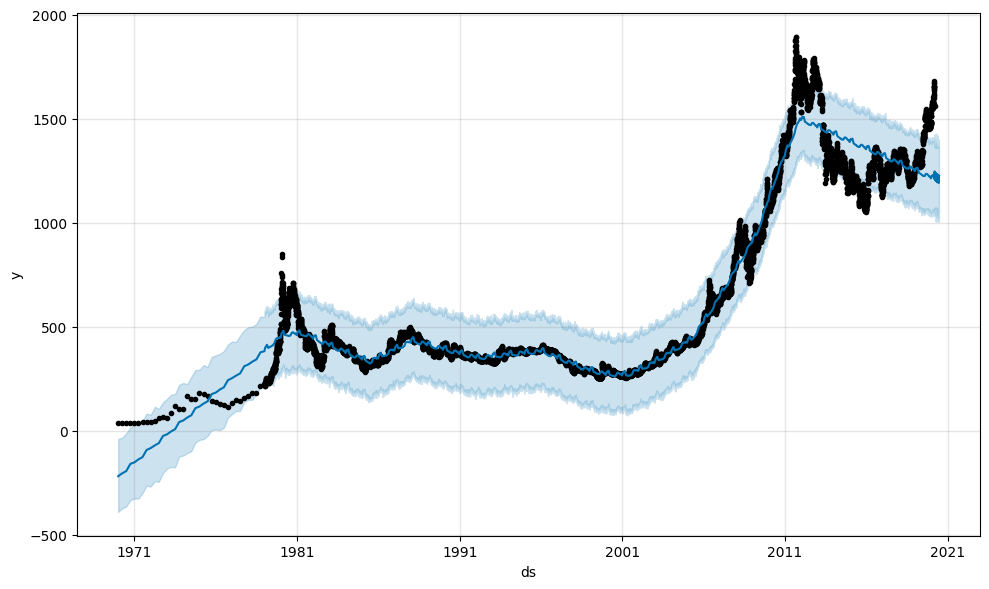

In [44]:
plot1 = m.plot(forecast)

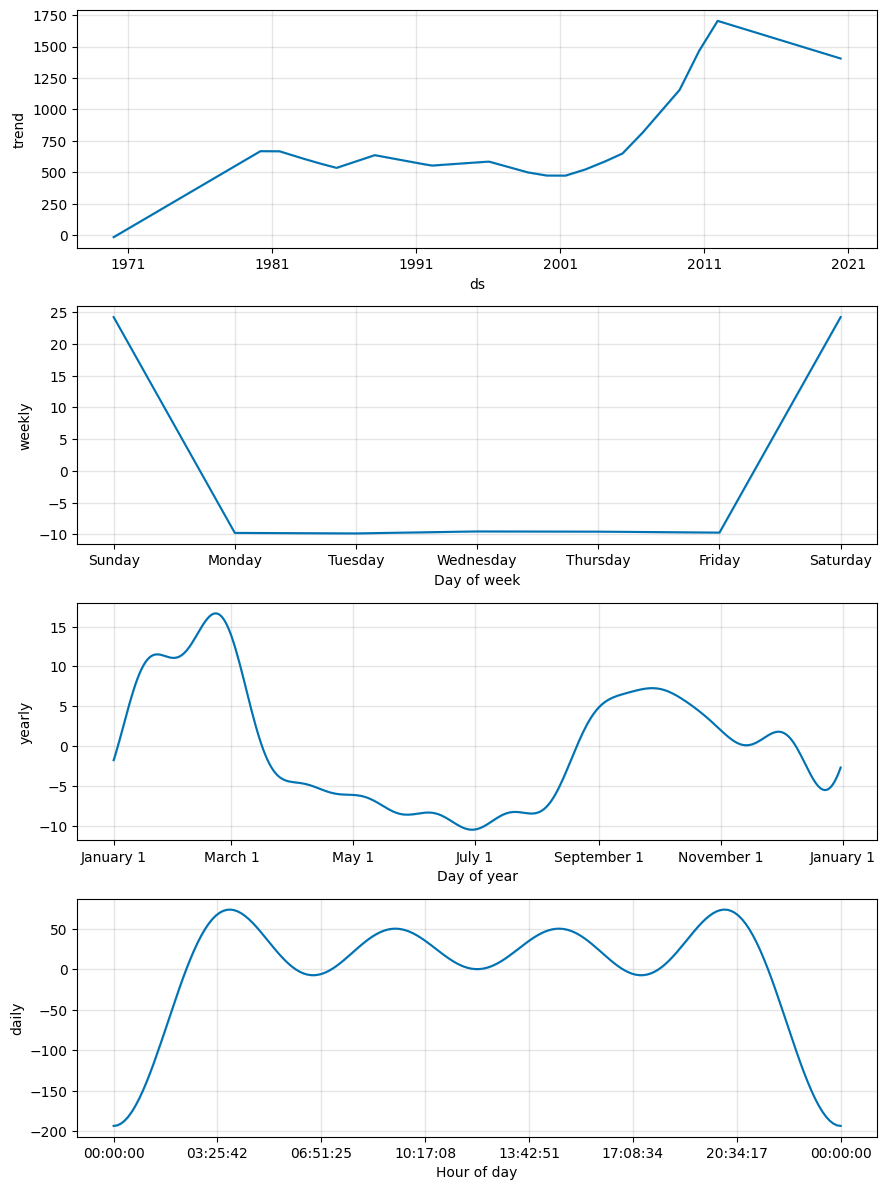

In [45]:
plot2 = m.plot_components(forecast)